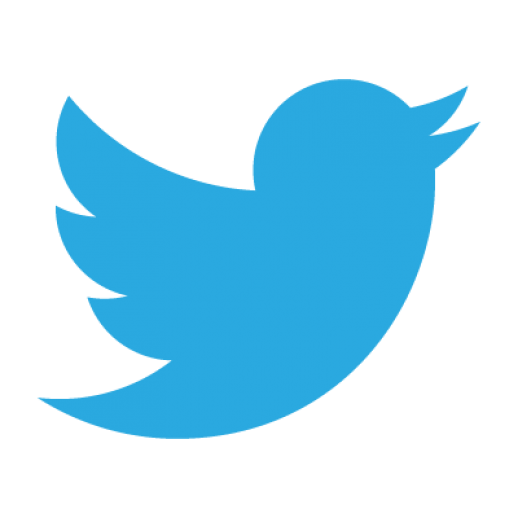

# Twitter NLP Sentimental Analysis

#### Authors: Raul Torres, Ziyuan Terry

### Overview

In this Twitter sentiment analysis project, we analyzed over 9,000 data points from Apple and Google, with positive, negative, and neutral responses. This was a supervised machine learning algorithm, where the training data was labeled with the correct sentiment (positive, negative, or neutral) for each tweet. The algorithm then learned from this training data to make predictions on the sentiment of new, unseen tweets. The results of the analysis showed that the majority of tweets about both Apple and Google were positive in sentiment, with a smaller percentage of negative and neutral tweets. This analysis provided valuable insights into public opinion about these two tech companies.

### Business Problem

Apple is interested in understanding how the public views the company and its products. In order to improve its marketing and public relation strategies, Apple has decided to conduct a Twitter sentiment analysis project to gather insights into public opinion. The project involves analyzing over 9,000 tweets about Apple and its products, using a supervised machine learning algorithm to classify the tweets as positive, negative, or neutral in sentiment. The results of the analysis will provide valuable information about the overall sentiment towards Apple, as well as specific areas where the company may need to improve in order to better align with public opinion. This information will be used to inform future marketing and public relation strategies for the company.

### Data Understanding

As part of the data understanding phase of this Twitter sentiment analysis project, we examined a dataset of over 9,000 tweets about both Apple and Google. The goal of this analysis was to understand the sentiment of these tweets, and to classify them as either positive or negative. This required us to use natural language processing (NLP) techniques to clean and prepare the data for analysis, as well as machine learning algorithms to make predictions on the sentiment of the tweets.

The data analysis showed that the majority of tweets about both Apple and Google were positive in sentiment, with a smaller percentage of negative tweets. This suggests that overall, people tend to have a positive sentiment towards these two companies. We filtered the data to only show positive and negative results for Apple, which may have influenced the results. In general, sentiment analysis can provide valuable insights into public opinion and attitudes towards a particular topic or company.

In [4]:
# Import necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import string
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,\
HashingVectorizer

In [10]:
# Reading data
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='Latin-1')
df.tail(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9083,"Google says the future is all around you! (ie,...",NaN,No emotion toward brand or product
9084,"Google says the future is location, location, ...",NaN,No emotion toward brand or product
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion
9086,Google says: want to give a lightning talk to ...,NaN,No emotion toward brand or product
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


## Data preparation

In [11]:
# check for nulls on tweet_text
df['tweet_text'].isna().sum()

1

In [12]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [13]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [22]:
# Replace iPhone to Apple
df['emotion_in_tweet_is_directed_at'].replace(to_replace='iPhone',
                                              value='Apple', 
                                              inplace=True)

In [23]:
# Replace ipad or iphone app to apple 
df['emotion_in_tweet_is_directed_at'].replace(to_replace='iPad or iPhone App', 
                                              value='Apple', 
                                              inplace=True)

In [18]:
# Replace ipad or iphone app to apple 
df['emotion_in_tweet_is_directed_at'].replace(to_replace='iPad', 
                                              value='Apple', 
                                              inplace=True)

In [19]:
# Replace ther Apple pr to apple 
df['emotion_in_tweet_is_directed_at'].replace(to_replace='Other Apple product or service', 
                                              value='Apple', 
                                              inplace=True)

In [9]:
# replace iPhone to Apple
df['emotion_in_tweet_is_directed_at'].replace(to_replace='iPhone', value='Apple', inplace=True)

In [10]:
# replace ipad or iphone app to apple 
df['emotion_in_tweet_is_directed_at'].replace(to_replace='iPad or iPhone App', value='Apple', inplace=True)

In [11]:
# replace ipad or iphone app to apple 
df['emotion_in_tweet_is_directed_at'].replace(to_replace='iPad', value='Apple', inplace=True)

In [12]:
# replace ther Apple pr to apple 
df['emotion_in_tweet_is_directed_at'].replace(to_replace='Other Apple product or service', value='Apple', inplace=True)

In [13]:
df['emotion_in_tweet_is_directed_at'].value_counts()

Apple                              2409
Google                              430
Other Google product or service     293
Android App                          81
Android                              78
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [22]:
# dropping the null value
df.dropna(subset=['tweet_text'], how='all', inplace=True)

In [23]:
# checking it has been dropped
df['tweet_text'].isna().sum()

0

In [24]:
# clean the text
# create a function 
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  #remove @ mentions
    text = re.sub(r'#', '', text)   #remove the '# symbol'
    text = re.sub(r'RT[\s]+', '', text)   #remove RT retweet
    text = re.sub(r'https?:\/\/\S+', '', text)  #remove the hyper link
    
    return text

#cleaning the text
df['tweet_text'] = df['tweet_text'].apply(cleanTxt)

In [25]:
# We removed numbers and punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['tweet_text'] = df['tweet_text'].apply(lambda x: remove_punct(x))

In [26]:
# Replaced Nan from second column to Apple or Google adding it to a fourth column
def Find_Apple_or_Google(text):
    category =''
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenizer = RegexpTokenizer(pattern)
    sample_doc = tokenizer.tokenize(text)
    sample_doc = [token.lower() for token in sample_doc]
    sw = stopwords.words('english')
    sample_doc = [token for token in sample_doc if token not in sw]
    ap = ['apple', 'ipad', 'iphone']
    go = ['google','android']
    if any((match := item) in sample_doc for item in ap):
        return 'Apple'
    elif any((match := item) in sample_doc for item in go):
        return 'Google'
    else:
        return 'NAN'

In [27]:
# Made list to make it easier
ap = ['apple', 'ipad', 'iphone']
go = ['google','android']

In [30]:
# Created a new column by applying our function
df['Product_Category'] = df['tweet_text'].apply(lambda x: Find_Apple_or_Google(x))

In [31]:
# This is the result
df['Product_Category'].value_counts() 

Apple     5263
Google    2481
NAN       1348
Name: Product_Category, dtype: int64

In [32]:
# Made a function to lowercase everything
# Tokenized
def tokenization(text):
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenizer = RegexpTokenizer(pattern)
    sample_doc = tokenizer.tokenize(text)
    return sample_doc

In [33]:
# Created a new column by applying our function
df['Tweet_tokenized'] = df['tweet_text'].apply(lambda x: tokenization(x.lower()))

In [34]:
# Stopwords english 
stopword = nltk.corpus.stopwords.words('english')

In [35]:
# Adding sxsw to the stop words   
new_stopwords = ["sxsw"]
stopword.extend(new_stopwords)

In [36]:
# Created a new functioin
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [37]:
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

In [38]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text


In [39]:
df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))

In [40]:
df['tweet_text'][0]

' I have a G iPhone After  hrs tweeting at RISEAustin it was dead  I need to upgrade Plugin stations at SXSW'

In [41]:
df['Tweet_tokenized'][0]

['i',
 'have',
 'a',
 'g',
 'iphone',
 'after',
 'hrs',
 'tweeting',
 'at',
 'riseaustin',
 'it',
 'was',
 'dead',
 'i',
 'need',
 'to',
 'upgrade',
 'plugin',
 'stations',
 'at',
 'sxsw']

In [42]:
df['Tweet_stemmed'][0]

['g',
 'iphon',
 'hr',
 'tweet',
 'riseaustin',
 'dead',
 'need',
 'upgrad',
 'plugin',
 'station']

In [43]:
# This concludes the cleaning 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
df['tweet_lemma'] = df['Tweet_nonstop'].apply(lambda x: word_lemmatizer(x))
df.tail(4)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Terry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,Product_Category,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,tweet_lemma
9089,Wave buzz We interrupt your regularly schedule...,NaN,No emotion toward brand or product,Google,"[wave, buzz, we, interrupt, your, regularly, s...","[wave, buzz, interrupt, regularly, scheduled, ...","[wave, buzz, interrupt, regularli, schedul, ge...","[wave, buzz, interrupt, regularly, scheduled, ..."
9090,Googles Zeiger a physician never reported pote...,NaN,No emotion toward brand or product,NAN,"[googles, zeiger, a, physician, never, reporte...","[googles, zeiger, physician, never, reported, ...","[googl, zeiger, physician, never, report, pote...","[google, zeiger, physician, never, reported, p..."
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,Apple,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,...","[verizon, iphon, custom, complain, time, fell,...","[verizon, iphone, customer, complained, time, ..."
9092,Ï¡ÏàüÊÎÒ£Áââ£âÛâGoogle ...,NaN,No emotion toward brand or product,Google,"[google, tests, checkin, offers, at, sxsw, link]","[google, tests, checkin, offers, link]","[googl, test, checkin, offer, link]","[google, test, checkin, offer, link]"


In [44]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [45]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
def visualize_top_10(freq_dist, title):
    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]
    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)
    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

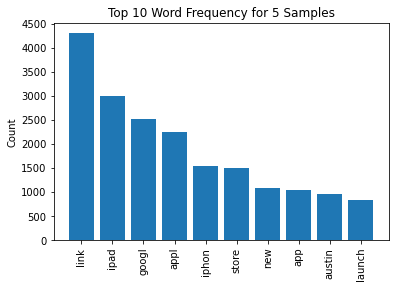

In [46]:
# Made visual for easier interpretation
sample_freq_dist = FreqDist(df['Tweet_stemmed'].explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency for 5 Samples")

In [47]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=sw)

In [48]:
# Made 'tweet_lemma' into sentence instead of a list to that it could run.
df['lemma_sentence'] =df['tweet_lemma'].apply(lambda x: " ".join(x))


In [49]:
# Selecting only the positive and negative values from the dataset 
df1 = df[(df.is_there_an_emotion_directed_at_a_brand_or_product == 'Positive emotion') | (df.is_there_an_emotion_directed_at_a_brand_or_product == 'Negative emotion')]


In [50]:
# Sanity check
df1['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2978
Negative emotion     570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [51]:
df1['emotion_in_tweet_is_directed_at'].value_counts()

Apple     2337
Google     854
Name: emotion_in_tweet_is_directed_at, dtype: int64

# Train Test Split

In [55]:
# splitting the training data into train and valid sets
from sklearn.model_selection import train_test_split
X = df1['lemma_sentence']
y = df1['is_there_an_emotion_directed_at_a_brand_or_product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [190]:
# Creating a count Vectorizer with default parameters 
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X_vec = vec.fit_transform(X_train)

In [57]:
# Creating a basline model with naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()
# Evaluate the classifier on X_train_vectorized and y_train
baseline_cv = cross_val_score(baseline_model, X_vec , y_train)
baseline_cv

array([0.84052533, 0.83646617, 0.84398496, 0.82706767, 0.83082707])

In [58]:
baseline_cv.mean()

0.8357742385983722

# Try more model classifier

Here, we are trying to make default model classifier to see if the cross val score will have a great improvement compared with our baseline model. But it seems like there's no improvement with both random forest and decision tree model

In [60]:
# Instantiating a default Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
model0 = RandomForestClassifier(random_state=42)
model0.fit(X_vec, y_train)
y_pred0 = model0.predict(X_t_vec)
print("Training Accuracy :", model0.score(X_vec, y_train))
print("Testing Accuracy :", model0.score(X_t_vec, y_test))


Training Accuracy : 0.8729800826756858
Testing Accuracy : 0.8376550169109357


In [61]:
# Evaluate the classifier
ran0_cv = cross_val_score(model0, X_vec, y_train, cv=5)
ran0_cv.mean()

0.8335214208128201

In [62]:
# Instantiating a default Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model0_de = DecisionTreeClassifier()
model0_de.fit(X_vec, y_train)
y_pred0_de = model0_de.predict(X_t_vec)
print("Training Accuracy :", model0_de.score(X_vec, y_train))
print("Testing Accuracy :", model0_de.score(X_t_vec, y_test))


Training Accuracy : 0.8729800826756858
Testing Accuracy : 0.8297632468996617


In [63]:
# Evaluate the classifier
dt1_cv = cross_val_score(model0_de, X_vec, y_train, cv=5)
dt1_cv.mean()

0.8173637658875142

# Grid search

Since the defalut random forest and decision tree model didn't have agood result. We thought about this problems and decided to use grid search on Count vecterizer to see if we can get a better result.

After we did the grid search for Count vecterizer, we found the best parameter as {ngram_range = (1,2), min_df= 2}. By applying these parameter, the result improved with cross val score as 0.870

In [64]:
# Instantiating Count vectorizer with updated parameters
vec1 = CountVectorizer(ngram_range = (1,2), min_df= 2)
X1_vec = vec1.fit_transform(X_train)


In [65]:
# Evaluate the classifier
ran1_cv = cross_val_score(model0, X1_vec, y_train, cv=5)
ran1_cv.mean()

0.8707295913329289

Now it's time to do some grid search for random forest. Here we trying more then ten grid searches and the grid search below was our best one. This was a very long grid search and took 663 min to run it through. The cross val score increased from 0.807 to 0.877

In [238]:
# Grid search for random forest parameters
grid4 = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

gs4 = GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid=grid4,
                 cv=5,
                 verbose=3,
                 n_jobs=-2)

In [239]:
gs4.fit(X1_vec,y_train)

Fitting 5 folds for each of 3960 candidates, totalling 19800 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 274 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-2)]: Done 498 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-2)]: Done 1138 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-2)]: Done 1554 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-2)]: Done 2034 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-2)]: Done 2578 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-2)]: Done 3186 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-2)]: Done 3858 tasks      | elapsed: 76.8min
[Parallel(n_jobs=-2)]: Done 4594 tasks      | elapsed: 97.4min
[Parallel(n_jobs=-2)]: Done 5394 tasks      | elapsed: 120.0min
[Parallel(n_jobs=-2)]: Done 6258 tasks      | elapsed: 147.1min
[Parallel(n_jobs=-2)]: Done 7186 tasks      |

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             verbose=3)

In [240]:
gs4.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [241]:
gs4.best_score_

0.8774915713298256

# Final model

For our final model, the best parameters for both vecterizer abd random forest model both showed below

Best parameter for Count vecterizer   :
{ngram_range : (1,2),
  min_df : 2}

Best parameter for random forest : 
{'bootstrap': False, 
 'max_depth': None, 
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [243]:
# Instantiating Random forest Classifier with best parameters
rf_final = RandomForestClassifier(bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators = 200)

In [244]:
# Evaluate the classifier for final model
cv_f = cross_val_score(rf_final, X1_vec, y_train)
cv_f.mean()

0.8741102286673532

In [245]:
rf_final.fit(X1_vec, y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_split=5, n_estimators=200)

In [246]:
y_pred_rf_final = rf_final.predict(X1_vec)

In [247]:
test_vec = vec1.transform(X_test)

In [248]:
test_pred = rf_final.predict(test_vec)

In [249]:
# accuracy score for final model
accuracy_score(y_test, test_pred)

0.8850056369785795

In [250]:
# classification report for final model
print(classification_report(y_test, test_pred))

                  precision    recall  f1-score   support

Negative emotion       0.81      0.34      0.47       137
Positive emotion       0.89      0.99      0.94       750

        accuracy                           0.89       887
       macro avg       0.85      0.66      0.70       887
    weighted avg       0.88      0.89      0.86       887



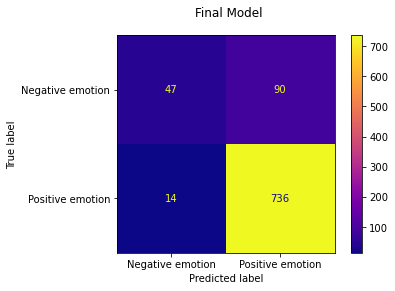

In [178]:
# creating confusion matrix for final model
fig, ax = plt.subplots()

fig.suptitle("Final Model")

plot_confusion_matrix(rf_final, test_vec, y_test, ax=ax, cmap="plasma");

# Visuals

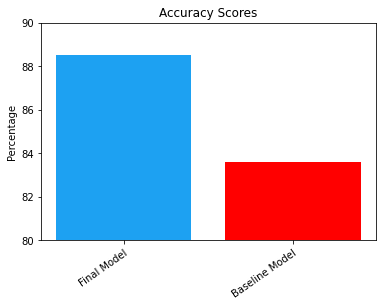

In [206]:
x_acc = ['Final Model', 'Baseline Model']
y_acc = [88.501,83.577]
plt.bar(x = x_acc, height = y_acc, color=['#1DA1F2', 'red'])
plt.xticks(rotation=35, ha="right", rotation_mode='anchor')
plt.ylim([80, 90])
plt.ylabel('Percentage')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Accuracy Scores")
plt.savefig('./accurancy_score.png', bbox_inches='tight');

We found out that the accuracy score is 83.577 for the baseline model. The best score for final model is 88.500 which was not a big improvement from the original data but it’s a pretty solid number closed to 90%.

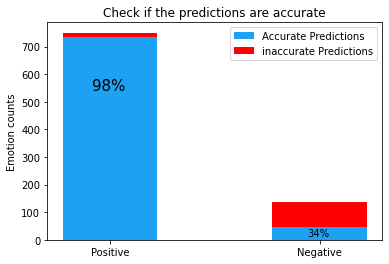

<Figure size 432x288 with 0 Axes>

In [207]:
labels = ['Positive', 'Negative']
co = [ 736, 47]
not_co = [14, 90]
width = 0.45

fig, ax = plt.subplots()

ax.bar(labels, co, width, label='Accurate Predictions', color='#1DA1F2')
ax.bar(labels, not_co, width, bottom=co,
       label='inaccurate Predictions', color='red')

ax.annotate('98%',xy=(45, 150), xycoords='axes pixels', fontsize=15)
ax.annotate('34%',xy=(260, 4), xycoords='axes pixels', fontsize=10)

ax.set_ylabel('Emotion counts')
ax.set_title('Check if the predictions are accurate')
ax.legend()



plt.show();
plt.savefig('./predictions.png', bbox_inches='tight');

The accurate prediction for positive emotion was great, but the model didn’t have a good performance with the negative emotion. The size of the dataset was one big reason for this. There are over 9000 rows for the original dataset but after we drop nans and filter row with only positive and negative emotions, only 3000 rows left. The model could have a better performance with more data points.

In [194]:
df['Product_Category'].value_counts()

Apple     5263
Google    2481
NAN       1348
Name: Product_Category, dtype: int64

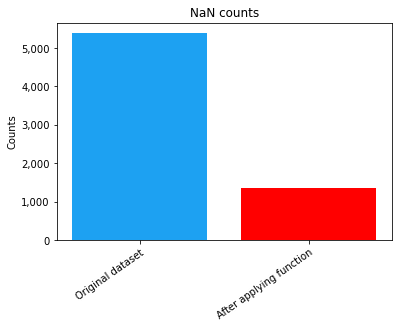

In [208]:
x_acc = ['Original dataset', 'After applying function']
y_acc = [5389,1348]
plt.bar(x = x_acc, height = y_acc, color=['#1DA1F2', 'red'])
plt.xticks(rotation=35, ha="right", rotation_mode='anchor')
plt.ylabel('Counts')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("NaN counts")
plt.savefig('./check_nan.png', bbox_inches='tight');

# Limitation and future plan

For the limitation, the biggest limitation would be data point as I mentioned. Something about the original data was not that good so We create a function trying to find product category better and only have 1348 nans which is 4000 nans less compared with the original dataset. Another limitation would be the percentage of positive emotion is very high shown from the previous slides. So, in the future with more time and money, we want to add more datapoints and continue refining the model. Maybe trying multi class model with neutral emotion to make our model more powerful.

# Conclusion

In conclusion, our model had a solid performance about predicting the emotion from a tweet. By using our model, Apple marking department could instantly find out the thoughts from people about specific product like ipad or iphone. And then they can decide if are going to Increase production on products who with more positive emotion. Or maybe contact technical department to make improvement on products with more negative emotion.